In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
import pickle
from sklearn.externals import joblib

In [2]:
df=pd.read_csv("Fuelcons.csv")
df.head(n=10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


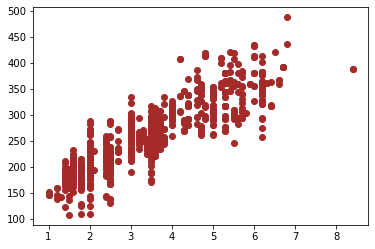

In [3]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS,color='brown')

In [4]:
value=np.random.rand(len(df))<.8
train=df[value]
test=df[~value]

In [5]:
print(train)

      MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
5          2014  ACURA         RLX        MID-SIZE         3.5          6   
7          2014  ACURA      TL AWD        MID-SIZE         3.7          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0 

In [6]:
print(test)

      MODELYEAR          MAKE                    MODEL VEHICLECLASS  \
3          2014         ACURA                  MDX 4WD  SUV - SMALL   
4          2014         ACURA                  RDX AWD  SUV - SMALL   
6          2014         ACURA                       TL     MID-SIZE   
11         2014         ACURA                      TSX      COMPACT   
13         2014  ASTON MARTIN                   RAPIDE   SUBCOMPACT   
...         ...           ...                      ...          ...   
1024       2014    VOLKSWAGEN  BEETLE TDI CLEAN DIESEL      COMPACT   
1034       2014    VOLKSWAGEN                    JETTA      COMPACT   
1051       2014    VOLKSWAGEN                   TIGUAN  SUV - SMALL   
1053       2014    VOLKSWAGEN           TIGUAN 4MOTION  SUV - SMALL   
1056       2014         VOLVO                      S60      COMPACT   

      ENGINESIZE  CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  \
3            3.5          6          AS6        Z                  12.7 

In [7]:
regr=lm.LinearRegression()
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(regr.coef_)

[[38.89788833]]


In [9]:
print(regr.intercept_)

[126.11566563]


In [10]:
#Saving the model
joblib.dump(regr,"fuelconsumption.pkl")

['fuelconsumption.pkl']

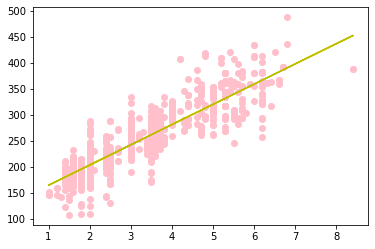

In [11]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='pink')
plt.plot(train_x, regr.intercept_ + regr.coef_ * train_x,'-y')
plt.show()

In [12]:
test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])
prediction=regr.predict(test_x)
print(prediction)

[[262.2582748 ]
 [262.2582748 ]
 [262.2582748 ]
 [262.2582748 ]
 [355.61320679]
 [203.9114423 ]
 [203.9114423 ]
 [203.9114423 ]
 [242.80933063]
 [242.80933063]
 [203.9114423 ]
 [242.80933063]
 [289.48679663]
 [328.38468496]
 [289.48679663]
 [289.48679663]
 [281.70721896]
 [281.70721896]
 [203.9114423 ]
 [203.9114423 ]
 [203.9114423 ]
 [359.50299563]
 [359.50299563]
 [203.9114423 ]
 [203.9114423 ]
 [242.80933063]
 [297.26637429]
 [242.80933063]
 [297.26637429]
 [297.26637429]
 [203.9114423 ]
 [203.9114423 ]
 [242.80933063]
 [219.47059763]
 [203.9114423 ]
 [266.14806363]
 [266.14806363]
 [367.28257329]
 [367.28257329]
 [266.14806363]
 [266.14806363]
 [196.13186463]
 [180.5727093 ]
 [266.14806363]
 [219.47059763]
 [293.37658546]
 [332.27447379]
 [332.27447379]
 [332.27447379]
 [332.27447379]
 [312.82552963]
 [359.50299563]
 [312.82552963]
 [266.14806363]
 [266.14806363]
 [223.36038646]
 [219.47059763]
 [219.47059763]
 [293.37658546]
 [293.37658546]
 [180.5727093 ]
 [180.5727093 ]
 [196.13

In [13]:
predict_df=pd.read_csv("fuel.csv")
predict_df.head()

,ENGINESIZE,CO2EMISSIONS
0,3.2,0


In [14]:
predict_x=np.asanyarray(predict_df[["ENGINESIZE"]])
prediction=regr.predict(predict_x)
print(prediction)

[[250.5889083]]
